In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2020 = pd.read_csv('2020 Cases Only.csv', low_memory=False)
df_2021 = pd.read_csv('2021 Cases Only.csv', low_memory = False)

In [3]:
df_all = pd.concat([df_2020, df_2021])

In [9]:
broward_data = df_all[df_all['County'] == 'Broward'].copy()
palm_beach_data = df_all[df_all['County'] == 'Palm Beach'].copy()

In [10]:

broward_data['EventDate'] = pd.to_datetime(broward_data['EventDate'], errors='coerce')
palm_beach_data['EventDate'] = pd.to_datetime(palm_beach_data['EventDate'], errors='coerce')


In [11]:
broward_daily_cases = broward_data.groupby('EventDate').size().reset_index(name='Daily Cases')
palm_beach_daily_cases = palm_beach_data.groupby('EventDate').size().reset_index(name='Daily Cases')

In [12]:
broward_daily_cases['7-Day Moving Average'] = broward_daily_cases['Daily Cases'].rolling(window=7).mean()
palm_beach_daily_cases['7-Day Moving Average'] = palm_beach_daily_cases['Daily Cases'].rolling(window=7).mean()

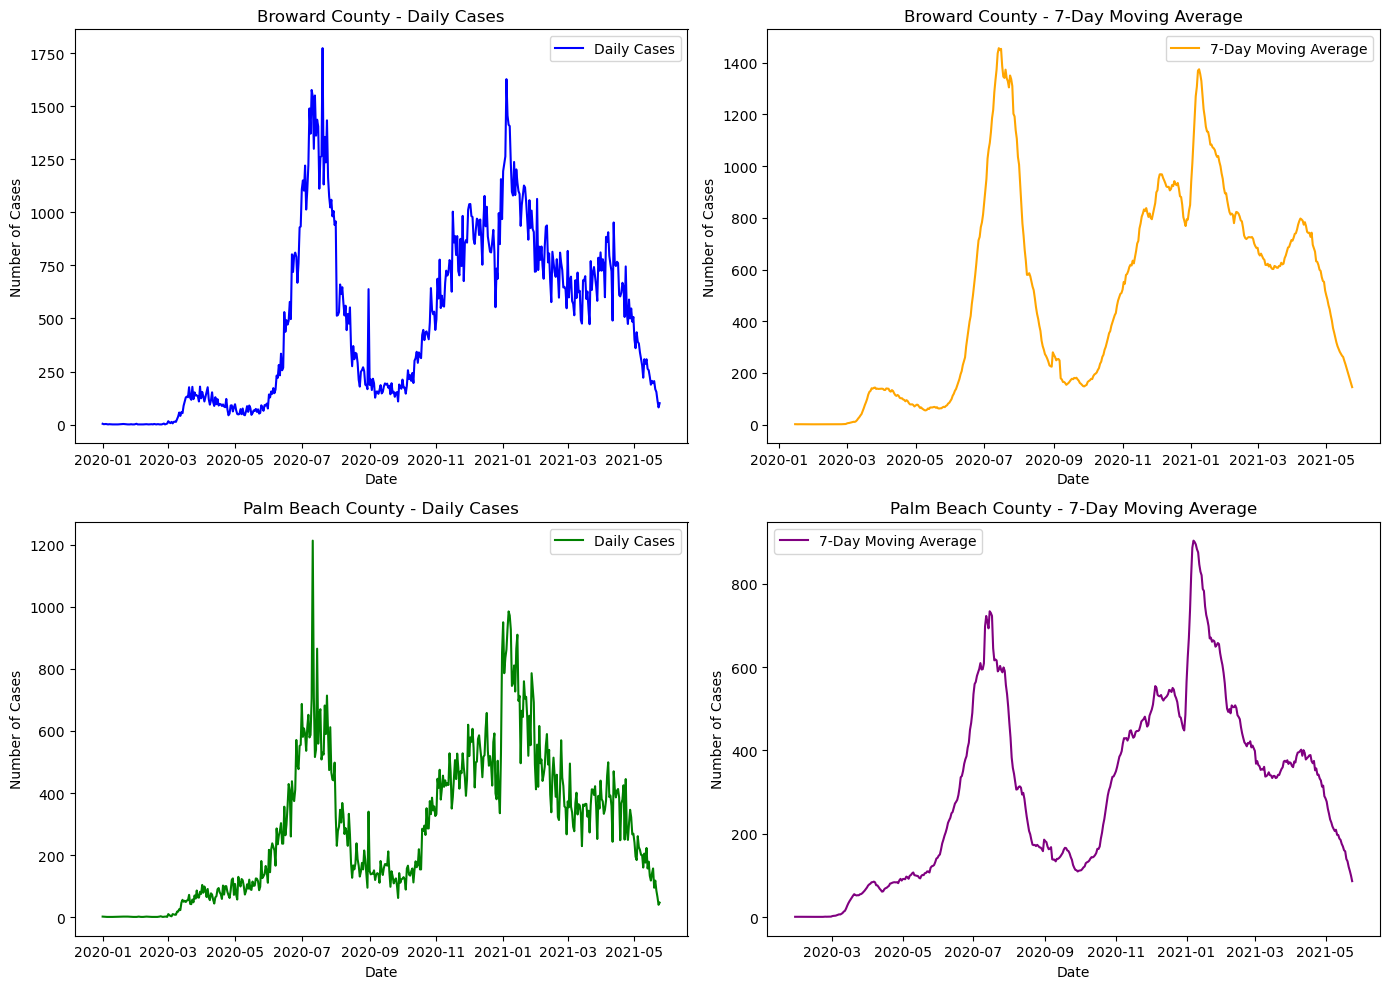

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs[0, 0].plot(broward_daily_cases['EventDate'], broward_daily_cases['Daily Cases'], color='blue', label='Daily Cases')
axs[0, 0].set_title('Broward County - Daily Cases')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Number of Cases')
axs[0, 0].legend()

axs[0, 1].plot(broward_daily_cases['EventDate'], broward_daily_cases['7-Day Moving Average'], color='orange', label='7-Day Moving Average')
axs[0, 1].set_title('Broward County - 7-Day Moving Average')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Number of Cases')
axs[0, 1].legend()

axs[1, 0].plot(palm_beach_daily_cases['EventDate'], palm_beach_daily_cases['Daily Cases'], color='green', label='Daily Cases')
axs[1, 0].set_title('Palm Beach County - Daily Cases')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Number of Cases')
axs[1, 0].legend()

axs[1, 1].plot(palm_beach_daily_cases['EventDate'], palm_beach_daily_cases['7-Day Moving Average'], color='purple', label='7-Day Moving Average')
axs[1, 1].set_title('Palm Beach County - 7-Day Moving Average')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Number of Cases')
axs[1, 1].legend()

plt.tight_layout()
plt.show()